In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
file = pd.read_csv("heart_data.txt")
file

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


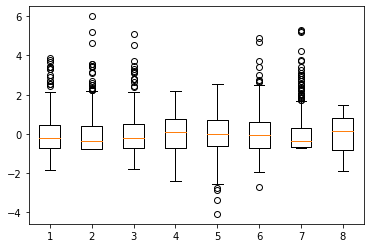

In [51]:
cont_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
cont_data = pd.DataFrame([file[col] for col in cont_cols]).T
cont_data = zscore(cont_data, ddof=1)
plt.boxplot(cont_data)
plt.show()

In [52]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
pcsT = pca.fit_transform(cont_data)
pcs = [pc for pc in pcsT.T]

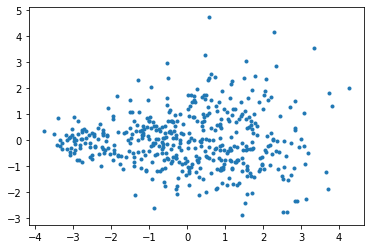

In [53]:
plt.plot(pcs[0], pcs[1], '.')
plt.show()

In [56]:
disease_data = list()
healthy_data = list()
for i in range(len(file['chd'])):
    if file['chd'][i] == 1:
        disease_data.append(pcsT[i])
    else:
        healthy_data.append(pcsT[i])

pcs_disease = [pc for pc in np.array(disease_data).T]
pcs_healthy = [pc for pc in np.array(healthy_data).T]

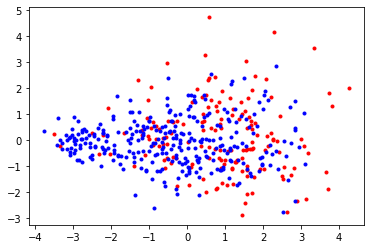

In [55]:
plt.plot(pcs_disease[0], pcs_disease[1],'r.')
plt.plot(pcs_healthy[0], pcs_healthy[1],'b.')
plt.show()